# **Laptop Price Prediction**

**Objective:** To develop a predictive model for estimating the price of laptops based on their specifications. By leveraging various supervised machine learning algorithms, we aim to identify the most accurate model for price prediction, providing valuable insights for both consumers and manufacturers in the laptop market.

**About the Dataset:** The dataset laptop_data.csv contains the following columns:

* Unnamed: 0: An index column.
* Company: The brand or manufacturer of the laptop (e.g., Dell, Apple, HP).
* TypeName: The type or category of the laptop (e.g., Ultrabook, Gaming, Notebook).
* Inches: The screen size of the laptop in inches.
* ScreenResolution: The resolution of the laptop screen (e.g., 1920x1080, 1366x768).
* Cpu: The central processing unit (CPU) model and speed of the laptop.
* Ram: The amount of random access memory (RAM) in the laptop, typically measured in GB.
* Memory: The storage capacity and type of the laptop (e.g., 256GB SSD, 1TB HDD).
* Gpu: The graphics processing unit (GPU) model in the laptop.
* OpSys: The operating system installed on the laptop (e.g., Windows, macOS, Linux).
* Weight: The weight of the laptop in kilograms.
* Price: The price of the laptop, which is the target variable for prediction.

**Significance:**

* Consumer Decision-Making: By predicting laptop prices based on specifications,
consumers can make more informed purchasing decisions and find the best value for their money.
* Market Analysis: Manufacturers and retailers can use the model to analyze market trends, optimize pricing strategies, and understand the impact of various features on the overall price.
* Product Development: Insights gained from the model can guide manufacturers in designing laptops that meet consumer demands while maintaining competitive pricing.

By implementing and comparing various supervised machine learning algorithms, including Linear Regression, Ridge Regression, Lasso Regression, KNeighborsRegressor, DecisionTreeRegressor, SupportVectorRegressor, RandomForestRegressor, and Adaboost Regressor, we aim to identify the most effective model for accurate laptop price prediction.

**1)Import required libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
import pickle
import warnings
warnings.filterwarnings('ignore')

# **Exploratory Data Analysis**

**2)Read the dataset**

In [91]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/laptop_data.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


**3) Statistical Analysis**

In [92]:
df.shape

(1303, 12)

The dataset contains 1303 rows and 12 columns.

In [93]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [95]:
# to obtain unique elements in each columns.
df.nunique()

Unnamed: 0          1303
Company               19
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price                791
dtype: int64

# **Data Cleaning**

**4) Handling Missing Values**

In [96]:
# To drop a column
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [97]:
df.shape

(1274, 11)

In [98]:
# To check the missing values
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

There is no missing values in the dataset.

**5)Datatype Conversion**

In [99]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [100]:
#to remove units of Ram and Weight
df['Ram']=df['Ram'].str.replace('GB',"")
df['Ram']=df['Ram'].astype(int)
df['Weight']=df['Weight'].str.replace('kg',"")
df['Weight']=df['Weight'].astype(float)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [101]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

**6)Data Visualization and Feature Engineering**

Text(0.5, 1.0, 'Price Distribution')

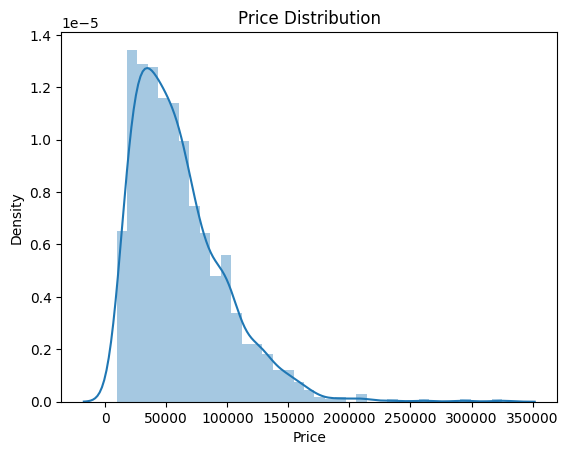

In [102]:
sns.distplot(df['Price'])
plt.title('Price Distribution')

**Insight:** From the distplot, it is clear that the prices in range(0-50000) are more in count.

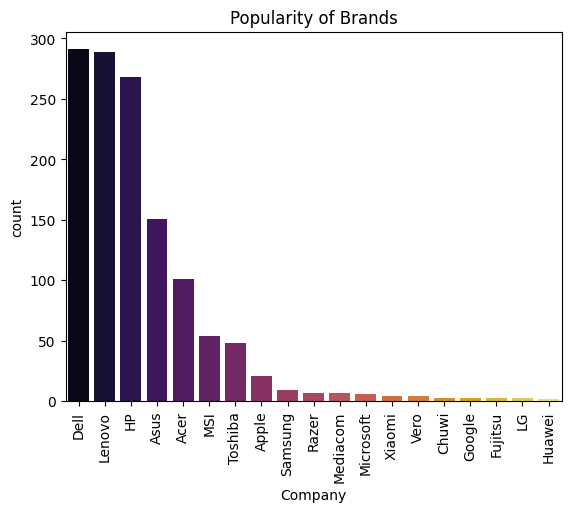

In [103]:
sns.barplot(df['Company'].value_counts(),palette='inferno')
plt.xticks(rotation='vertical')
plt.title('Popularity of Brands')
plt.show()

**Insight:** From the barplot, it is evident that majority of the laptops in the dataset are from Dell. Only few number of laptops are of Huawei.

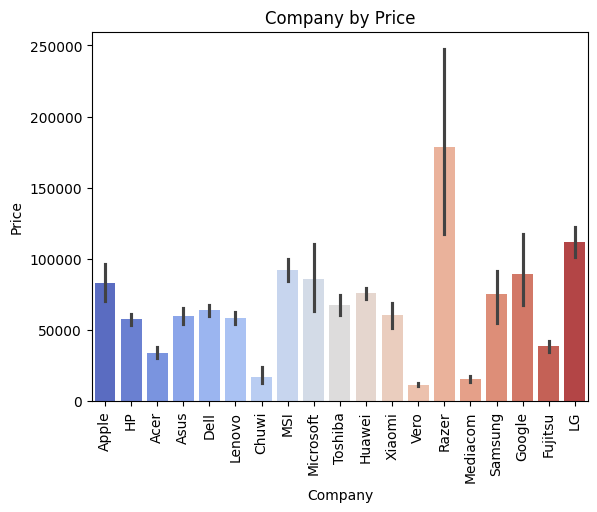

In [104]:
sns.barplot(x=df['Company'],y=df['Price'],palette='coolwarm')
plt.xticks(rotation='vertical')
plt.title('Company by Price')
plt.show()

**Insight:** From the barplot, it is clear that Razer laptops are high in price. Whereas Vero brand has low price range.

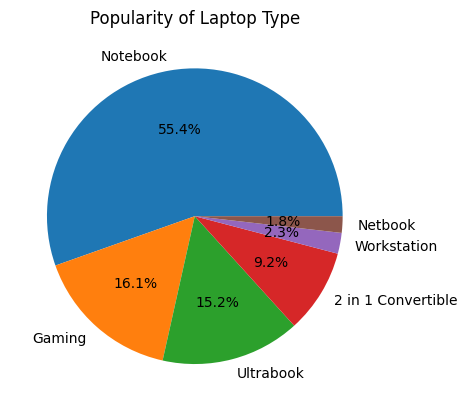

In [105]:
plt.pie(df['TypeName'].value_counts(),labels=df['TypeName'].value_counts().index,
        autopct='%1.1f%%',textprops={'size': 'medium'}, radius=1)
plt.title('Popularity of Laptop Type')
plt.show()

**Insight:** From the piechart, it is evident that Notebook type of the laptop are more in count and Netbook type laptops are less in count.

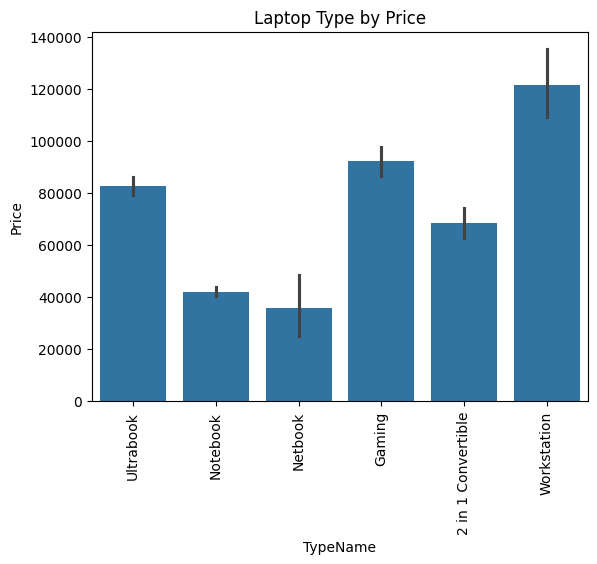

In [106]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.title('Laptop Type by Price')
plt.show()

**Insight:** From the barplot, it is clear that Price range is more for Workstation type laptops and less for Netbook type laptops.

Text(0.5, 1.0, 'Inches by Price')

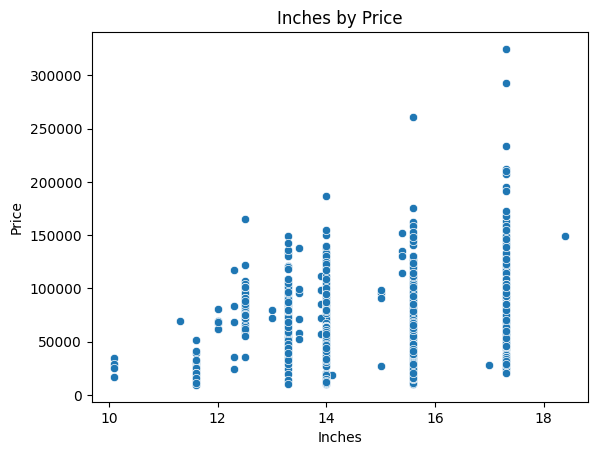

In [107]:
sns.scatterplot(x=df['Inches'],y=df['Price'])
plt.title('Inches by Price')

**Insight:** From the scatterplot, it is clear that inches of range(16-18) have high price range.

In [108]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

Text(0.5, 1.0, 'Touchscreen by Price')

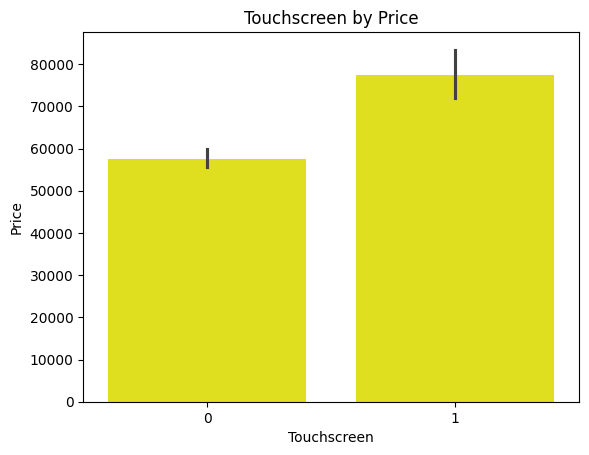

In [110]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
sns.barplot(x=df['Touchscreen'],y=df['Price'],color='yellow')
plt.title('Touchscreen by Price')

**Insight:** From the barchart, it is clear that laptops with touchscreen have high price range.

Text(0.5, 1.0, 'IPS by Price')

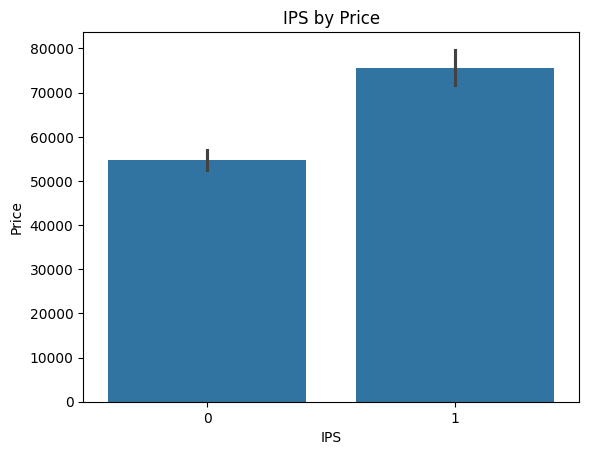

In [35]:
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
sns.barplot(x=df['IPS'],y=df['Price'])
plt.title('IPS by Price')

**Insight:** From the barchart, it is evident that laptops with IPS Panel have high price range.

In [36]:
temp=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [37]:
df['screen_width']=temp[0]
df['screen_height']=temp[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,screen_width,screen_height
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [38]:
df['screen_width']=df['screen_width'].str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,screen_width,screen_height
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [39]:
df['screen_width']=df['screen_width'].astype(int)
df['screen_height']=df['screen_height'].astype(int)

In [40]:
df['PPI']=(((df['screen_width']**2)+(df['screen_height']**2))**0.5/df['Inches']).astype(float)

In [41]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
Touchscreen           int64
IPS                   int64
screen_width          int64
screen_height         int64
PPI                 float64
dtype: object

In [42]:
df.drop(['ScreenResolution','Inches','screen_width','screen_height'],axis=1,inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [43]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [44]:
df['Cpu Name']=df['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [45]:
def Cpu_processor(text):
  if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
    return text
  else:
    if text.split()[0]=="Intel":
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'

In [46]:
df['Cpu Brand']=df['Cpu Name'].apply(Cpu_processor)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name,Cpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


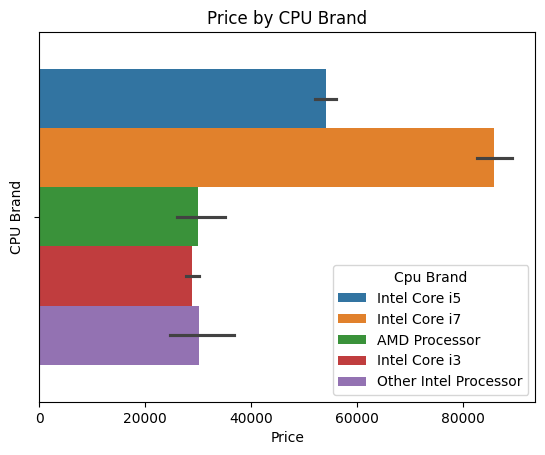

In [48]:
sns.barplot(data=df,
            x='Price',
            hue='Cpu Brand')
plt.title('Price by CPU Brand')
plt.xlabel('Price')
plt.ylabel('CPU Brand')
plt.show()

**Insight:** From the barchart, it is evident that most of the laptops have intel core i7 processor.

In [49]:
df.drop(['Cpu','Cpu Name'],axis=1,inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [50]:
df['Ram'].value_counts()

Ram
8     613
4     366
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Ram Size by Price')

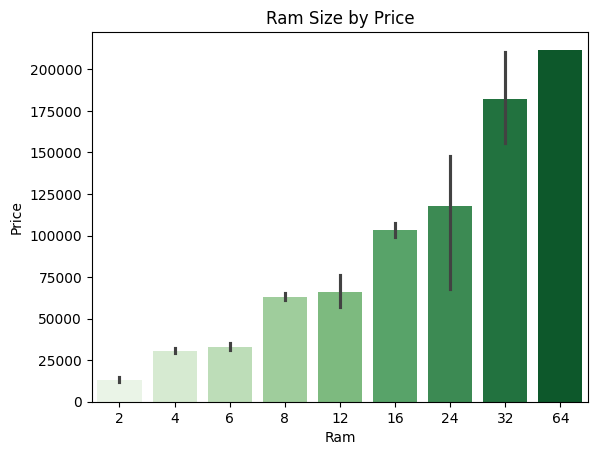

In [52]:
sns.barplot(x=df['Ram'],y=df['Price'],palette='Greens')
plt.title('Ram Size by Price')

**Insight:** From the barchart, it is clear that most of the laptops have 64GB Ram.

In [53]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [54]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["second"]= new[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,first,second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,None


In [55]:
df['first'].value_counts()

first
256 SSD              412
1000 HDD             216
500 HDD              123
512 SSD              114
128 SSD               96
256 SSD               88
128 SSD               74
32 Flash Storage      36
512 SSD               20
2000 HDD              16
1000 SSD              14
64 Flash Storage      13
256 Flash Storage      8
16 Flash Storage       7
1000 Hybrid            7
32 SSD                 6
180 SSD                5
128 Flash Storage      4
16 SSD                 3
1000 SSD               2
512 Flash Storage      2
64 SSD                 1
64 Flash Storage       1
1000 HDD               1
32 HDD                 1
128 HDD                1
240 SSD                1
8 SSD                  1
508 Hybrid             1
Name: count, dtype: int64

In [56]:
df['second'].value_counts()

second
  1000 HDD       185
  2000 HDD        15
  256 SSD          3
  500 HDD          2
  1000 Hybrid      2
  512 SSD          1
Name: count, dtype: int64

In [57]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,None,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,None,0,1,0,0


In [58]:
df['first'] = df['first'].str.findall(r'\d+').apply(lambda x:x[0])
df["second"].fillna("0", inplace = True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,0,1,0,0


In [59]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,0,1,0,0,0,0,0,0


In [60]:
df['second'] = df['second'].str.findall(r'\d+').apply(lambda x:x[0])
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,0,1,0,0,0,0,0,0


In [61]:
df['first'].value_counts()

first
256     508
1000    240
128     175
512     136
500     123
32       43
2000     16
64       15
16       10
180       5
240       1
8         1
508       1
Name: count, dtype: int64

In [62]:
df['second'].value_counts()

second
0       1066
1000     187
2000      15
256        3
500        2
512        1
Name: count, dtype: int64

In [63]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [64]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['Memory','first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [65]:
df.corr(numeric_only=True)['Price']

Ram              0.740106
Weight           0.212192
Price            1.000000
Touchscreen      0.188631
IPS              0.250358
PPI              0.469539
HDD             -0.098011
SSD              0.669957
Hybrid           0.022533
Flash_Storage   -0.037176
Name: Price, dtype: float64

In [66]:
df.drop(['Hybrid','Flash_Storage'],axis=1,inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [67]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [68]:
df['Gpu Brand Name']=df['Gpu'].apply(lambda x:x.split()[0])
df=df[df['Gpu Brand Name']!='ARM']
df.drop('Gpu',axis=1,inplace=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand Name
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


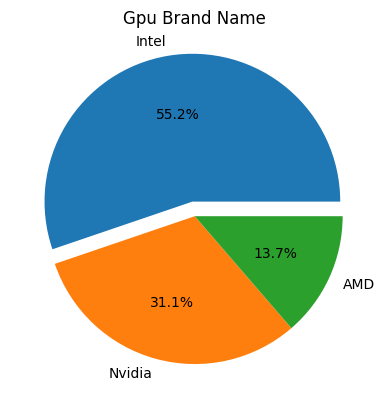

In [74]:
explode = [0.1,0,0]
df['Gpu Brand Name'].value_counts()
top10_price = df['Gpu Brand Name'].value_counts()
plt.pie(top10_price,
        labels=top10_price.index,
        explode=explode,
        autopct='%1.1f%%')
plt.title('Gpu Brand Name')
plt.show()

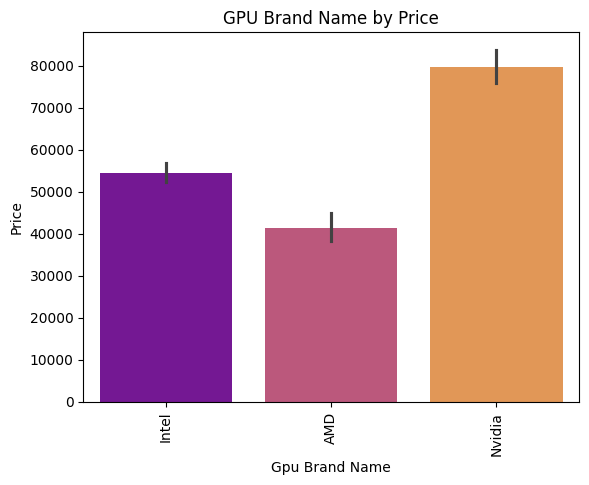

In [75]:
sns.barplot(x=df['Gpu Brand Name'],y=df['Price'],palette='plasma')
plt.xticks(rotation='vertical')
plt.title('GPU Brand Name by Price')
plt.show()

**Insight:** From the barchart, it is clear that price range is high for laptops having Nvidia Gpu Processor.

In [76]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [77]:
def cat_os(inp):
    if inp=='Windows 10' or inp=='Windows 7' or inp=='Windows 10 S':
        return 'Windows'
    elif inp=='macOS' or inp=='Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [78]:
df['OS'] = df['OpSys'].apply(cat_os)
df.drop('OpSys',axis=1,inplace=True)
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand Name,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


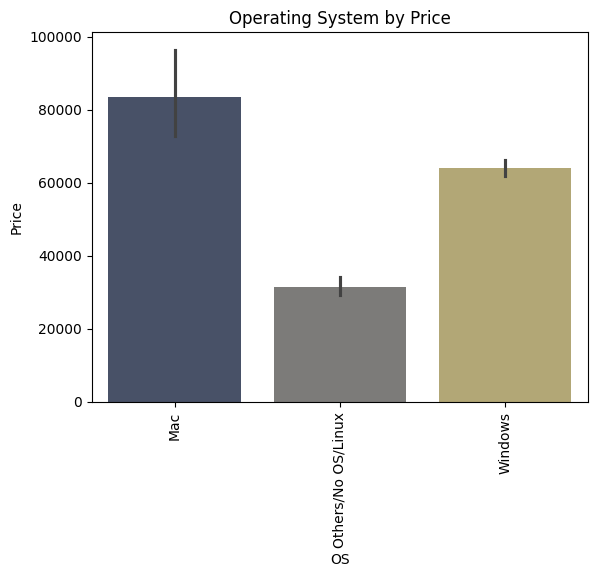

In [80]:
sns.barplot(x=df['OS'],y=df['Price'],palette='cividis')
plt.xticks(rotation='vertical')
plt.title('Operating System by Price')
plt.show()

**Insight:** From the barchart, it is evident that price range is high for laptops having Mac OS.

Text(0.5, 1.0, 'Weight Distribution')

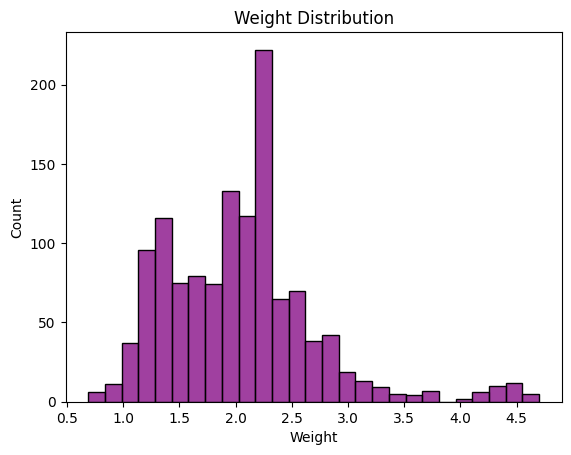

In [81]:
sns.histplot(df['Weight'],color='purple')
plt.title('Weight Distribution')

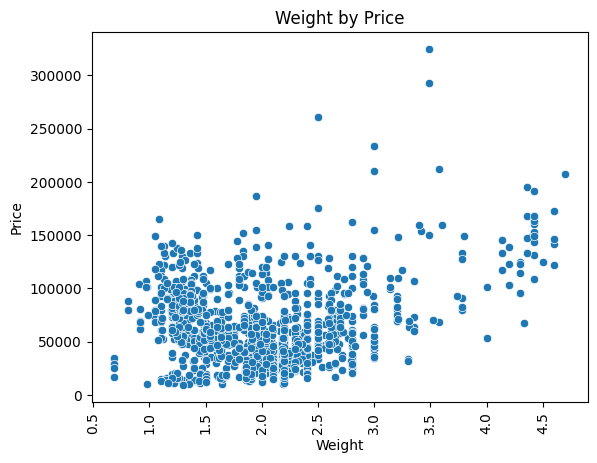

In [82]:
sns.scatterplot(x=df['Weight'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.title('Weight by Price')
plt.show()

Text(0.5, 1.0, 'Price Distribution')

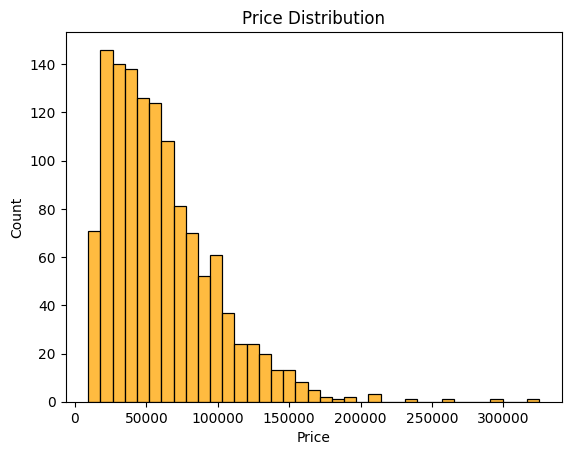

In [88]:
sns.histplot(df['Price'],color='orange')
plt.title('Price Distribution')

Text(0.5, 1.0, 'Price Distribution')

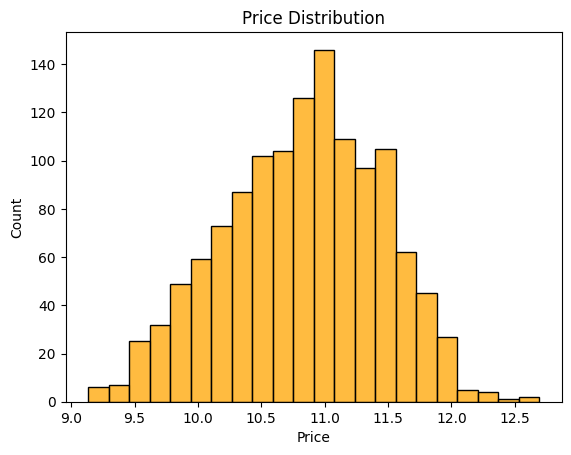

In [89]:
sns.histplot(np.log(df['Price']),color='orange')
plt.title('Price Distribution')

**7) Feature Correlation**

In [ ]:
df.corr(numeric_only=True)

,Ram,Weight,Price,Touchscreen,IPS,PPI,HDD,SSD
Ram,1.000000,0.389134,0.739996,0.113316,0.202809,0.294927,0.097340,0.599552
Weight,0.389134,1.000000,0.211667,-0.292288,0.023966,-0.319499,0.510876,-0.056985
Price,0.739996,0.211667,1.000000,0.190382,0.251514,0.471481,-0.098481,0.669808
Touchscreen,0.113316,-0.292288,0.190382,1.000000,0.136973,0.452107,-0.205105,0.252142
IPS,0.202809,0.023966,0.251514,0.136973,1.000000,0.288833,-0.090411,0.215197
PPI,0.294927,-0.319499,0.471481,0.452107,0.288833,1.000000,-0.290774,0.499899
HDD,0.097340,0.510876,-0.098481,-0.205105,-0.090411,-0.290774,1.000000,-0.400625
SSD,0.599552,-0.056985,0.669808,0.252142,0.215197,0.499899,-0.400625,1.000000


<Axes: >

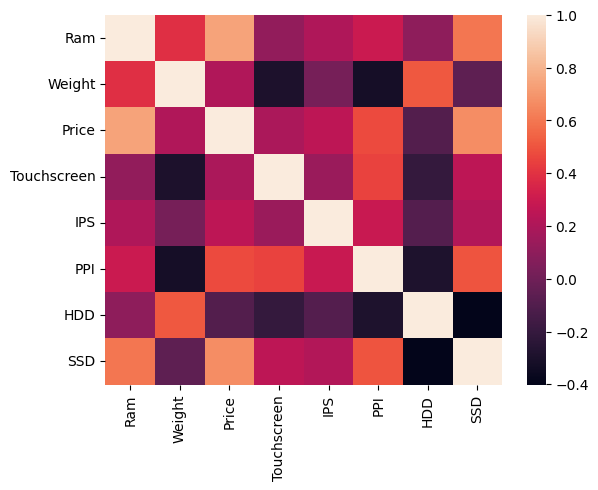

In [ ]:
sns.heatmap(df.corr(numeric_only=True))

**8) Splitting data to X and y**

In [ ]:
Ind_var=df.drop(columns=['Price'])
Ind_var

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand Name,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,2.20,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1270,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1271,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1272,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [ ]:
Dep_var=np.log(df['Price'])
Dep_var

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1269    10.555257
1270    10.433899
1271    11.288115
1272     9.409283
1273    10.614129
Name: Price, Length: 1273, dtype: float64

**9) Splitting data to train data and test data**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(Ind_var,Dep_var,test_size=0.10,random_state=2)

# **Building ML models**

In [ ]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
lr=LinearRegression()
rg=Ridge(alpha=10,random_state=42)
ls=Lasso(alpha=0.001,random_state=42)
knn=KNeighborsRegressor(n_neighbors=3)
dt=DecisionTreeRegressor(max_depth=8,random_state=42)
sv=SVR(kernel='rbf')
rf=RandomForestRegressor(n_estimators=100,random_state=42,max_samples=0.5,max_features=0.75,max_depth=15)
ad=AdaBoostRegressor(n_estimators=15,random_state=42)

step2 = [lr,rg,ls,knn,dt,sv,rf,ad]
for i in step2:
  print('_'*50,i,'_'*50)
  pipe = Pipeline([('step1',step1),('step2',i)])
  pipe.fit(X_train,y_train)
  y_pred = pipe.predict(X_test)
  print('R2 Score',r2_score(y_test,y_pred))
  print('MAE',mean_absolute_error(y_test,y_pred))

__________________________________________________ LinearRegression() __________________________________________________
R2 Score 0.7926901156667799
MAE 0.22065476517716653
__________________________________________________ Ridge(alpha=10, random_state=42) __________________________________________________
R2 Score 0.7927938535467675
MAE 0.2235451409312221
__________________________________________________ Lasso(alpha=0.001, random_state=42) __________________________________________________
R2 Score 0.7911292878893352
MAE 0.22399649007048428
__________________________________________________ KNeighborsRegressor(n_neighbors=3) __________________________________________________
R2 Score 0.7486634726488367
MAE 0.2154187555553761
__________________________________________________ DecisionTreeRegressor(max_depth=8, random_state=42) __________________________________________________
R2 Score 0.8019037046093079
MAE 0.2164088620174775
__________________________________________________ SVR() _

In [ ]:
# Accuracy Comparison
Table=pd.DataFrame({'Model':['Linear regression','Ridge Regression','Lasso Regression',' KNeighborsRegressor','DecisionTreeRegressor','SupportVectorRegressor','RandomForestRegressor','Adaboost Regressor'],'R2 Score':[0.792,0.792,0.791,0.748,0.801,0.651,0.852,0.768],
                     'MAE':[0.220,0.223,0.223,0.215,0.216,0.264,0.179,0.250]})
Table['R2 Score']=Table['R2 Score']*100
Table

,Model,R2 Score,MAE
0,Linear regression,79.2,0.220
1,Ridge Regression,79.2,0.223
2,Lasso Regression,79.1,0.223
3,KNeighborsRegressor,74.8,0.215
4,DecisionTreeRegressor,80.1,0.216
5,SupportVectorRegressor,65.1,0.264
6,RandomForestRegressor,85.2,0.179
7,Adaboost Regressor,76.8,0.250


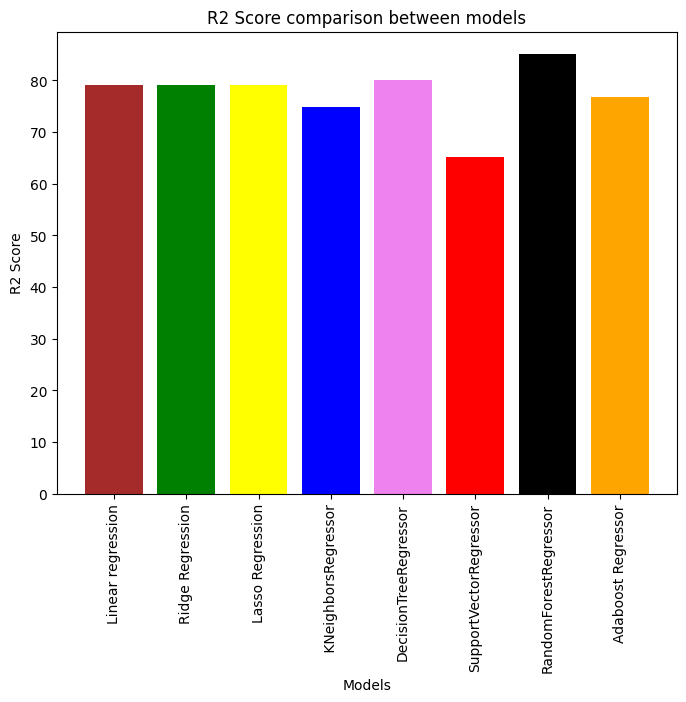

In [ ]:
# Plotting Accuracy of Models
plt.figure(figsize=(8,6))
Models=['Linear regression','Ridge Regression','Lasso Regression',' KNeighborsRegressor','DecisionTreeRegressor','SupportVectorRegressor','RandomForestRegressor','Adaboost Regressor']
r2_score=[79.2,79.2,79.1,74.8,80.1,65.1,85.2,76.8]
plt.title('R2 Score comparison between models')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.bar(Models,r2_score,color=['brown','green','yellow','blue','violet','red','black','orange'])
plt.xticks(rotation='vertical')
plt.show()


**Insight:** From the bar chart, it is evident that Random Forest Regressor model has high R2 Score and low MAE.

**Predicting the Laptop Price**

In [ ]:
# Selecting the best performing model and training it again with data for prediction
best_model = RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)
rf_pipe = Pipeline([('step1', step1), ('step2', best_model)])
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2',
                 RandomForestRegressor(max_depth=15, max_features=0.75,
                                       max_samples=0.5, random_state=3))])

In [ ]:
sample = pd.DataFrame([['Apple', 'Ultrabook', '8', '1.37', '0', '1', '226.983005', 'Intel Core i5', '0', '128', 'Intel', 'Mac']],
                      columns=['Company', 'TypeName', 'Ram', 'Weight', 'Touchscreen', 'IPS', 'PPI', 'Cpu Brand', 'HDD', 'SSD', 'Gpu Brand Name', 'OS'])
y_new = rf_pipe.predict(sample)
print('Predicted Price:', y_new)

Predicted Price: [11.13052688]


In [ ]:
Price=np.exp(y_new)
print("The predicted price of this configuration is ",Price)

The predicted price of this configuration is  [68222.3074989]


**Exporting the model**

In [ ]:
pickle.dump(rf_pipe,open('rf_pipe.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))

**Deploying the model using Stremlit**

In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
from PIL import Image
import pickle
import numpy as np

# Custom CSS to set background color and font color
page_bg_img = '''
<style>
body {
    background-color: #000000;
    color: #ffffff;
}
/* Style for select boxes */
div[data-baseweb="select"] > div:first-child, .st-ct {
    background-color: #000000 !important;
    color: #ffffff !important;
}

/* Style for number input */
.stNumberInput input {
    background-color: #000000;
    color: #ffffff;
}
</style>
'''
st.markdown(page_bg_img, unsafe_allow_html=True)

# import the model
pipe = pickle.load(open('/content/drive/MyDrive/saved models/rf_pipe.pkl','rb'))
df = pickle.load(open('/content/drive/MyDrive/saved models/df.pkl','rb'))

st.title("Laptop Price Predictor")
st.subheader("Welcome! Here you can find out the price of your desired Laptop.")
image=Image.open('/content/drive/MyDrive/laptop_img.jpeg')
st.image(image, width=800)

st.subheader("Fill in the fields")

# brand
company = st.selectbox('Brand',df['Company'].unique())

# type of laptop
typename = st.selectbox('Type',df['TypeName'].unique())

# Ram
ram = st.selectbox('RAM(in GB)',[2,4,6,8,12,16,24,32,64])

# weight
weight = st.number_input('Weight of the Laptop')

# Touchscreen
touchscreen = st.selectbox('Touchscreen',['No','Yes'])

# IPS
ips = st.selectbox('IPS',['No','Yes'])

# screen size
inches = st.number_input('Screen Size')

# resolution
screen_resolution = st.selectbox('Screen Resolution',['1920x1080','1366x768','1600x900','3840x2160','3200x1800','2880x1800','2560x1600','2560x1440','2304x1440'])

#cpu
cpu = st.selectbox('CPU',df['Cpu Brand'].unique())

hdd = st.selectbox('HDD(in GB)',[0,128,256,512,1024,2048])

ssd = st.selectbox('SSD(in GB)',[0,8,128,256,512,1024])

gpu = st.selectbox('GPU',df['Gpu Brand Name'].unique())

os = st.selectbox('OS',df['OS'].unique())

if st.button('Predict Price'):

    if touchscreen == 'Yes':
        touchscreen = 1
    else:
        touchscreen = 0

    if ips == 'Yes':
        ips = 1
    else:
        ips = 0

    screen_width= int(screen_resolution.split('x')[0])
    screen_height= int(screen_resolution.split('x')[1])
    ppi = ((screen_width**2) + (screen_height**2))**0.5/inches

    # create the query array
    query = np.array([company,typename,ram,weight,touchscreen,ips,ppi,cpu,hdd,ssd,gpu,os],dtype=object).reshape(1, -1)

    # make the prediction
    predicted_price = int(np.exp(pipe.predict(query)[0]))
    st.title(f"The predicted price of this configuration is {predicted_price}")

Writing app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.168.116.153


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.168.116.153:8501

npx: installed 22 in 7.044s
your url is: https://common-masks-punch.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
  Stopping...
^C
